In [1]:
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime

import seawater as sw

# Settings

In [2]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [3]:
loni=360-70
lonf=360-23

In [4]:
leveli= 10
levelf=1910

In [5]:
def weighted_temporal_mean(ds, var):
    """
    Weight by days in each month
    """
    # Determine the month length
    month_length = ds.time.dt.days_in_month

    # Calculate the weights
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)

    # Subset our dataset for our variable
    obs = ds[var]

    # Setup our masking for nan values
    cond = obs.isnull()
    ones = xr.where(cond, 0.0, 1.0)

    # Calculate the numerator
    obs_sum = (obs * wgts).resample(time="AS").sum(dim="time")

    # Calculate the denominator
    ones_out = (ones * wgts).resample(time="AS").sum(dim="time")

    # Return the weighted average
    return obs_sum / ones_out

## Extract data

### GLORYS

In [6]:
RG = xr.open_dataset('./Data/GLORYS_interp_24N.nc')

### RG

In [7]:
RG = xr.open_dataset('./Data/RG_interp_24N.nc')
RG_2000 = RG.interp(pre = np.arange(leveli,levelf,10), method="linear")

In [8]:
RG_2000_yr = RG_2000.resample(time='YS').mean('time')

### ISAS 

In [9]:
DS = xr.open_dataset('./Data/ISAS20_interp_24N.nc')
temperature = DS.temperature.values
salinity = DS.salinity.values
lon = DS.lon.values
time = DS.time.values
pre = sw.pres(DS.depth,24.5)


In [10]:
DS2 = xr.Dataset(
    data_vars=dict(
        temperature=(["time","pre","lon"], temperature),
        salinity=(["time","pre","lon"], salinity),
    ),
    coords=dict(
        lon=(["lon"], lon),
        pre=(["pre"], pre),
        time=time,
    ),
    attrs=dict(description="Roemmich-Gilson Argo Climatology"),
)

In [11]:
ISAS_2000 = DS2.interp(pre = np.arange(leveli,levelf,10), method="linear")

In [12]:
ISAS_2000_yr = ISAS_2000.resample(time='YS').mean('time')

### EN4 l09

In [13]:
DS = xr.open_dataset('./Data/EN422l09_interp_24N.nc')
ptemperature = DS.temperature.values-273
salinity = DS.salinity.values
lon = DS.lon.values
time = DS.time.values
pre = sw.pres(DS.depth,24.5)

In [14]:
preM = np.repeat(pre, ptemperature.shape[0]*ptemperature.shape[2], axis=0).reshape(42,888,94).swapaxes(0,1)
temperature=sw.temp(salinity,ptemperature,preM)

In [15]:
DS2 = xr.Dataset(
    data_vars=dict(
        temperature=(["time","pre","lon"], temperature),
        salinity=(["time","pre","lon"], salinity),
    ),
    coords=dict(
        lon=(["lon"], lon),
        pre=(["pre"], pre),
        time=time,
    ),)

In [16]:
EN422l09_2000 = DS2.interp(pre = np.arange(leveli,levelf,10), method="linear")

In [17]:
EN422l09_2000_yr = EN422l09_2000.resample(time='YS').mean('time')

### EN4 g10

In [18]:
DS = xr.open_dataset('./Data/EN422g10_interp_24N.nc')
ptemperature = DS.temperature.values-273
salinity = DS.salinity.values
lon = DS.lon.values
time = DS.time.values
pre = sw.pres(DS.depth,24.5)

In [19]:
preM = np.repeat(pre, ptemperature.shape[0]*ptemperature.shape[2], axis=0).reshape(42,888,94).swapaxes(0,1)
temperature=sw.temp(salinity,ptemperature,preM)

In [20]:
DS2 = xr.Dataset(
    data_vars=dict(
        temperature=(["time","pre","lon"], temperature),
        salinity=(["time","pre","lon"], salinity),
    ),
    coords=dict(
        lon=(["lon"], lon),
        pre=(["pre"], pre),
        time=time,
    ),)

In [21]:
EN422g10_2000 = DS2.interp(pre = np.arange(leveli,levelf,10), method="linear")

In [22]:
EN422g10_2000_yr = EN422g10_2000.resample(time='YS').mean('time')

In [23]:
var= EN422g10_2000_yr.temperature.mean('pre').mean('lon').values
years= EN422g10_2000_yr.time.dt.year.values

In [24]:
var

array([10.02735362, 10.05395852,  9.97880961,  9.99856666, 10.03336456,
       10.03406391, 10.04477181,  9.98674928, 10.02437027, 10.00050868,
       10.02921151, 10.03188967, 10.04465102, 10.00967874,  9.95799267,
       10.02165926, 10.04911262, 10.04047087,  9.99357949,  9.97053293,
        9.98397544,  9.97583313,  9.99351345,  9.9799571 , 10.01430118,
       10.07576906, 10.10020687, 10.08072553, 10.14353937, 10.041932  ,
       10.11976253, 10.04091691, 10.06643912, 10.06314304, 10.04275466,
       10.06473325, 10.18069148, 10.18116706, 10.10620421, 10.1102081 ,
       10.11361188, 10.06914123, 10.04948613, 10.02902125, 10.07793104,
       10.06959685, 10.09992257, 10.12042746, 10.12813377, 10.09656197,
       10.10419634, 10.11963029, 10.20197994, 10.24812447, 10.14398296,
       10.06499405, 10.10780814, 10.08838927, 10.07637161, 10.10228053,
       10.08994215, 10.1408204 , 10.16437239, 10.23325499, 10.28411993,
       10.26963305, 10.27677389, 10.26510833, 10.24190816, 10.22

<xarray.DataArray 'polyfit_coefficients' (degree: 2)> Size: 16B
array([1.07826492e-19, 1.00393740e+01])
Coordinates:
  * degree   (degree) int64 16B 1 0

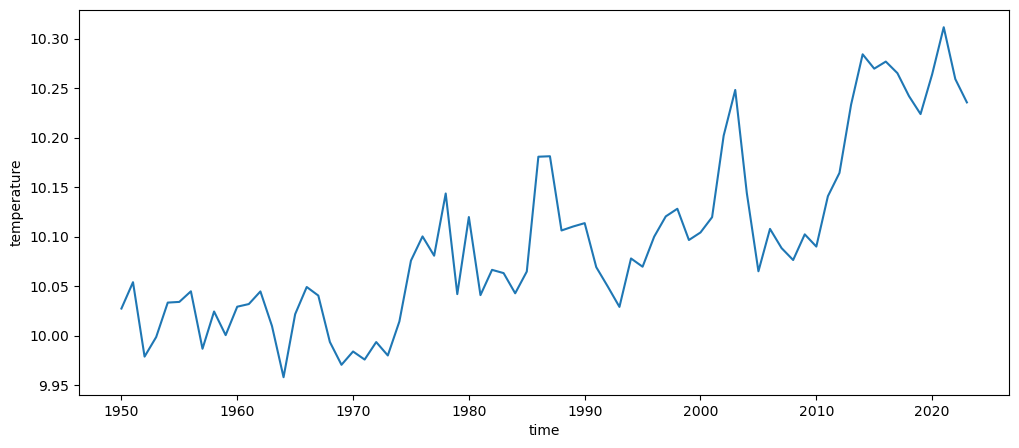

In [25]:
EN422g10_2000_yr.temperature.mean('pre').mean('lon').plot()

# Apply polyfit.
result = EN422g10_2000_yr.temperature.mean('pre').mean('lon').polyfit(dim = "time", deg = 1)
# The polyfit coefficients can be accessed like this.
result.polyfit_coefficients

# Plots

In [26]:
def plot_timeseries(var):
    ig, ax = plt.subplots(3,1,figsize = (14,4*3))
    
    preis=[ 200 , 200,  800]  
    prefs=[1800 , 800, 1800]  
    for i in range(0, 3):
     prei=preis[i]  
     pref=prefs[i]  
     ax[i].plot(ISAS_2000.time,ISAS_2000[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'), color='g',alpha=0.1)
     ax[i].plot(ISAS_2000_yr.time,ISAS_2000_yr[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'), label='ISAS',color='g',marker='o',linewidth=2)

     ax[i].plot(EN422l09_2000.time,EN422l09_2000[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'),color='r',alpha=0.1)
     ax[i].plot(EN422l09_2000_yr.time,EN422l09_2000_yr[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'), label='EN422l09',color='r',marker='o',linewidth=2)

     ax[i].plot(EN422g10_2000.time,EN422g10_2000[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'), color='m',alpha=0.1)
     ax[i].plot(EN422g10_2000_yr.time,EN422g10_2000_yr[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'), '--', label='EN422g10',color='m',marker='s',linewidth=2)

     ax[i].plot(RG_2000.time,RG_2000[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'),color='b',alpha=0.1)
     ax[i].plot(RG_2000_yr.time,RG_2000_yr[var].sel(pre=slice(prei,pref)).mean('pre').mean('lon'), label='RG',color='b',marker='o',linewidth=2)

     ax[i].grid(color='gray', linestyle=':')
     ax[i].legend()
     ax[i].set_title(var+' '+str(prei)+'-'+str(pref))
    


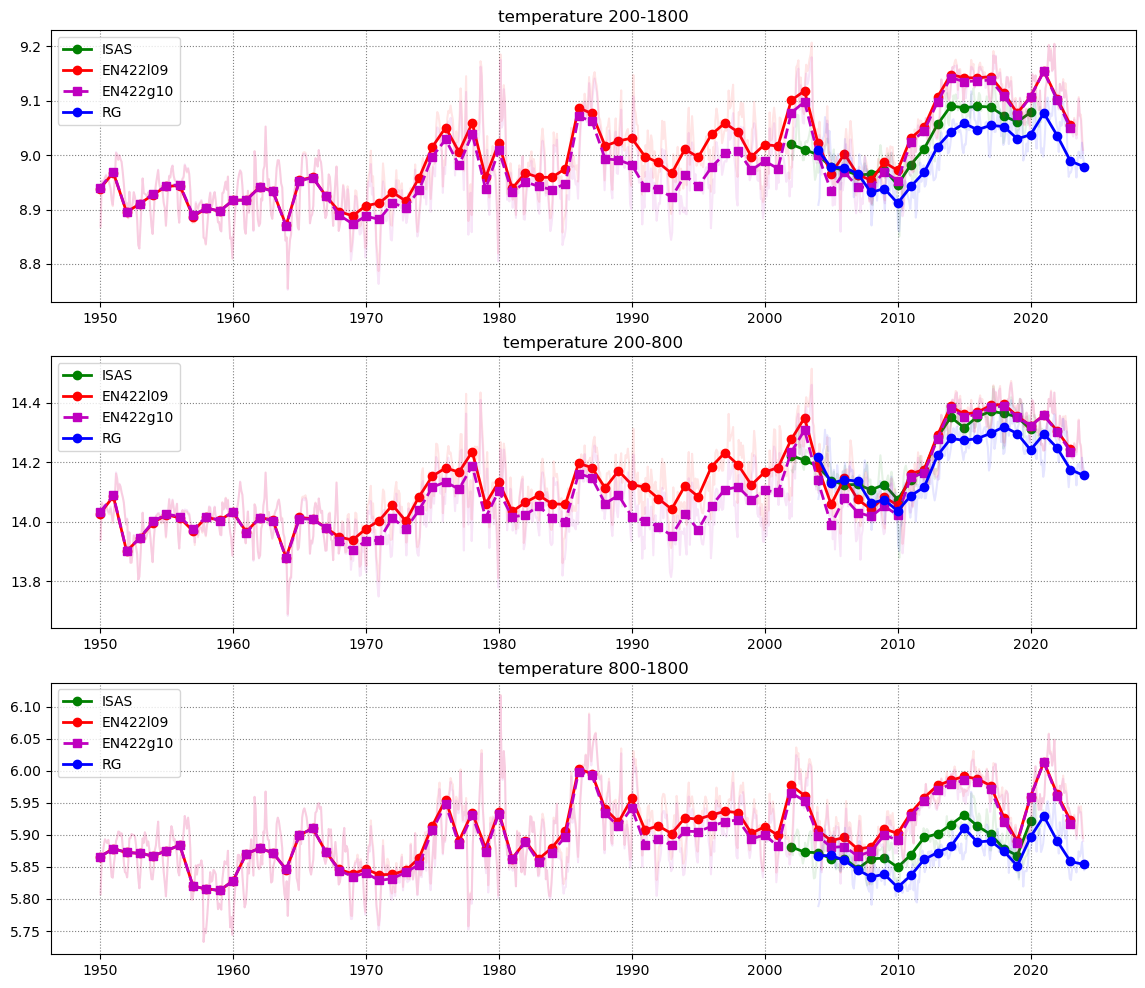

In [27]:
plot_timeseries('temperature')

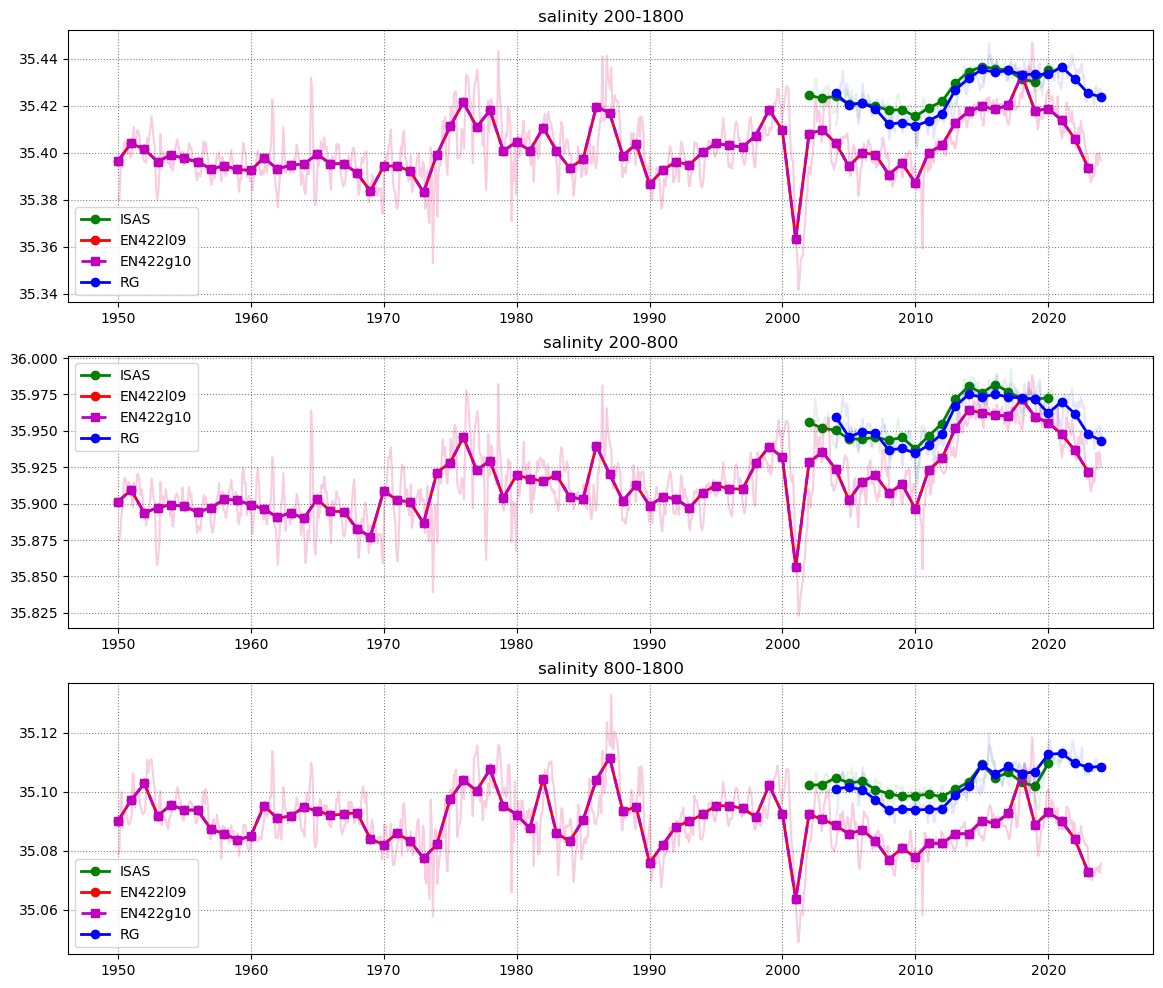

In [28]:
plot_timeseries('salinity')